# Modelo de regresión simple

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


**Pregunta a resolver**: Determinar cuál es el salario de un trabajador  basado en los años de experiencia.

In [6]:
df.skew()

YearsExperience    0.420163
Salary             0.209005
dtype: float64

<Axes: xlabel='YearsExperience', ylabel='Count'>

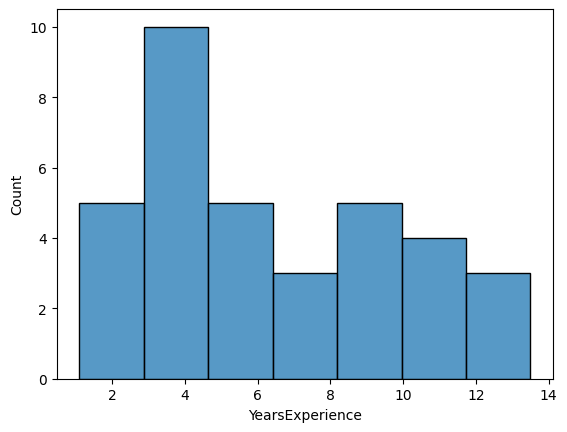

In [13]:
import seaborn as sns
sns.histplot(x=df['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Salary'>

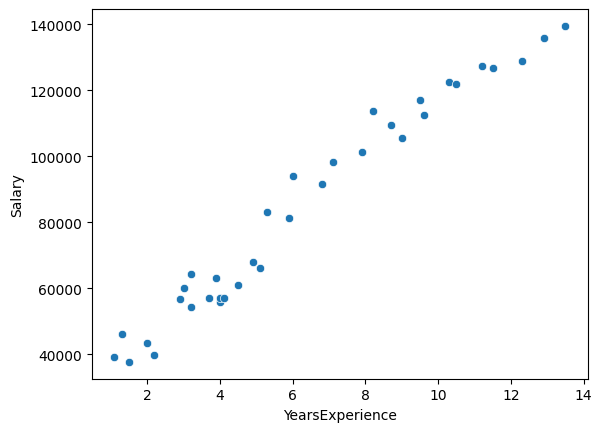

In [14]:
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])

In [15]:
model = LinearRegression()

In [18]:
X = df[['YearsExperience']]
y = df['Salary']

In [19]:
lineal_reg = model.fit(X,y)

In [20]:
lineal_reg.coef_

array([8731.94104706])

In [21]:
lineal_reg.intercept_

28859.52619453144

In [36]:
y_pred = lineal_reg.predict(X) 
y_pred

array([ 38464.6613463 ,  40211.04955571,  41957.43776513,  46323.40828866,
        48069.79649807,  54182.15523101,  55055.34933572,  56801.73754513,
        56801.73754513,  61167.70806866,  62914.09627808,  63787.29038278,
        63787.29038278,  64660.48448749,  68153.26090631,  71646.03732514,
        73392.42553455,  75138.81374396,  80377.9783722 ,  81251.17247691,
        88236.72531456,  90856.30762868,  97841.86046633, 100461.44278044,
       104827.41330398, 107446.99561809, 111812.96614163, 112686.16024633,
       118798.51897928, 120544.90718869, 126657.26592163, 129276.84823575,
       136262.4010734 , 141501.56570164, 146740.73032988])

In [25]:
lineal_reg.score(X,y)

0.9651633106751443

In [26]:
import matplotlib.pyplot as plt

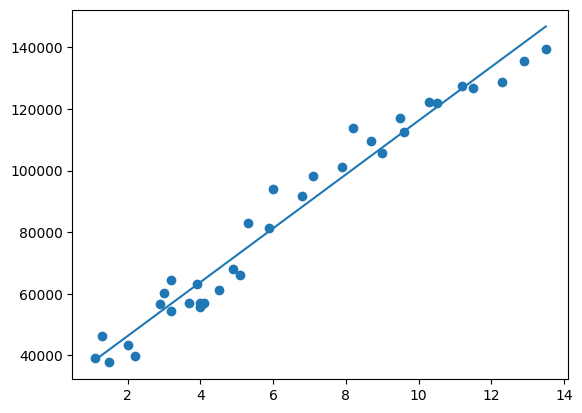

In [37]:
plt.scatter(X,y)
plt.plot(X,y_pred)


# Regresión lineal múltiple

In [3]:
datos = pd.read_csv('advertising.csv')
datos.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


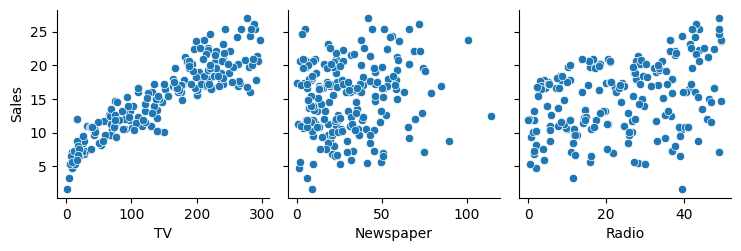

In [5]:
import seaborn as sns
sns.pairplot(datos, x_vars = ['TV','Newspaper','Radio'],y_vars='Sales')

In [6]:
datos.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

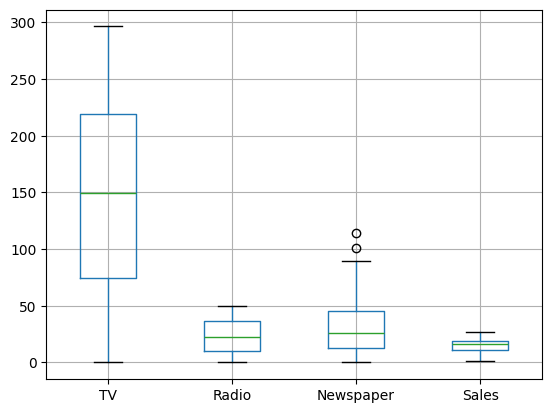

In [7]:
datos.boxplot()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

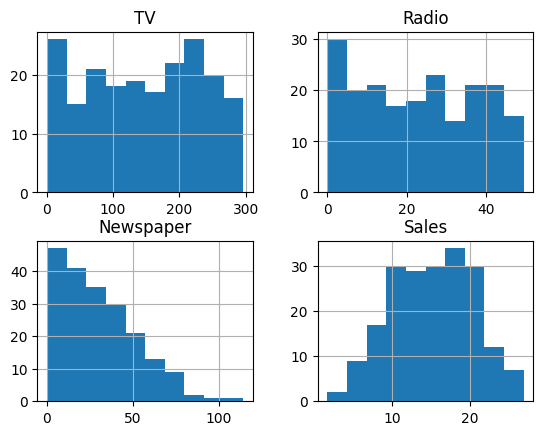

In [8]:
datos.hist()

In [9]:
datos.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [12]:
# Verificar si tenemos multicoleanidad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = datos[['TV','Radio','Newspaper']]
y = datos['Sales']

X = add_constant(X)

VIF_data = pd.DataFrame()
VIF_data['Variable'] = X.columns
VIF_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF_data

,Variable,VIF
0,const,6.848900
1,TV,1.004611
2,Radio,1.144952
3,Newspaper,1.145187


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [14]:
X = datos[['TV','Radio','Newspaper']]
y = datos['Sales']

In [15]:
model.fit(X,y)

LinearRegression()

In [16]:
model.intercept_

4.625124078808653

In [17]:
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [21]:
sales_pred = model.predict(X)
sales_pred

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

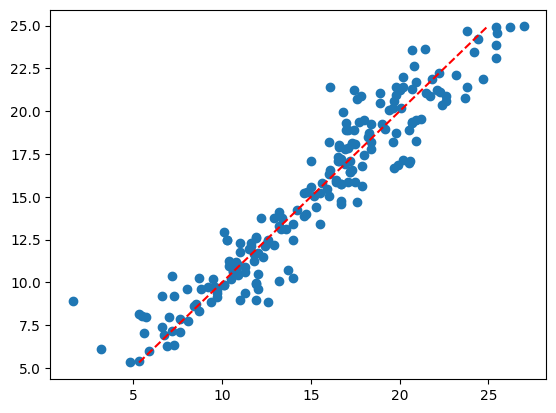

In [27]:
import matplotlib.pyplot as plt
plt.scatter(datos['Sales'],sales_pred)
plt.plot([sales_pred.min(),sales_pred.max()],[sales_pred.min(),sales_pred.max()],'--',color='red')

In [28]:
# R-squared
model.score(X,y)

0.9025912899684558

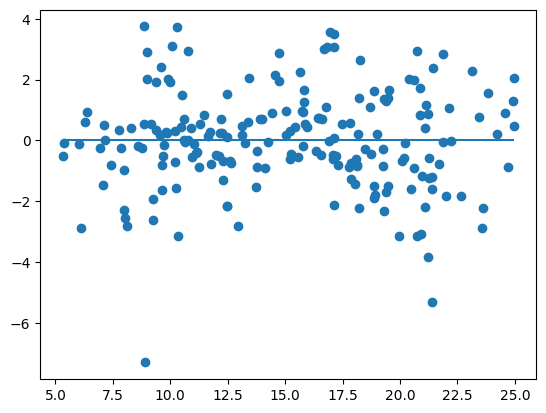

In [29]:
residuos = y-sales_pred
plt.scatter(sales_pred,residuos)
plt.hlines(y=0, xmin=sales_pred.min(), xmax=sales_pred.max())

In [35]:
import statsmodels.api as sm

X2 = datos[['TV','Radio']]
X2 = add_constant(X)
y2 = datos['Sales']

In [36]:
model2 = sm.OLS(y2, X2).fit()
model2.params

const        4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [37]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           8.13e-99
Time:                        18:39:18   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regresión con PCR

In [38]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [39]:
datos.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [46]:
modelo = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA()),
    ('regresion',LinearRegression())
])

In [47]:
X = datos[['TV','Radio','Newspaper']]
y = datos['Sales']

In [48]:
modelo.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('regresion', LinearRegression())])

In [49]:
modelo.predict(X)

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

In [44]:
modelo.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('sacaler', StandardScaler()), ('pca', PCA()),
                ('regresion', LinearRegression())])>

In [51]:
regresor = modelo.named_steps['regresion']

In [52]:
regresor.coef_

array([ 2.06992121,  4.32260897, -1.13244033])

In [53]:
regresor.intercept_

15.130500000000001

In [56]:
pca = modelo.named_steps['pca']
pca.components_

array([[ 0.20787391,  0.69139674,  0.69192412],
       [ 0.97814838, -0.14965532, -0.14432267],
       [-0.0037659 , -0.70680537,  0.70739804]])

In [57]:
from sklearn.metrics import r2_score

score = r2_score(y,modelo.predict(X))
score

0.9025912899684558

In [ ]:
modelo.predict([[]])

## Modelos no lineales

In [58]:
df = pd.read_csv('ExpansiónCobre.csv')
df.head()

,Expansión,Kelvin
0,0.591,24.41
1,1.547,34.82
2,2.902,44.09
3,2.894,45.07
4,4.703,54.98


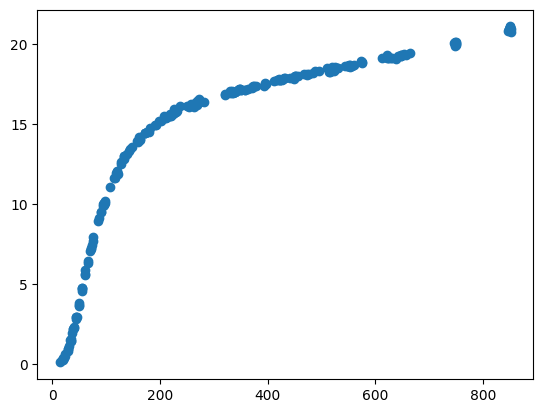

In [60]:
plt.scatter(df['Kelvin'],df['Expansión'])

In [61]:
def logistica(t,a,m,n,tau):
    return a*(1+m*np.exp(-t/tau))/(1+n*np.exp(-t/tau))

In [78]:
def polinomio(x,a,b,c,d,e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

In [62]:
X = df['Kelvin'].values
y = df['Expansión'].values

In [63]:
from scipy.optimize import curve_fit

In [79]:
params, params_cov = curve_fit(polinomio,X,y)

In [80]:
params

array([-3.31837775e+00,  1.78828336e-01, -5.66837230e-04,  7.72580215e-07,
       -3.69934874e-10])

In [81]:
params_cov

array([[ 1.82205737e-02, -2.89431230e-04,  1.27202839e-06,
        -2.07810497e-09,  1.12576937e-12],
       [-2.89431230e-04,  5.76145921e-06, -2.76778373e-08,
         4.74436371e-11, -2.64781482e-14],
       [ 1.27202839e-06, -2.76778373e-08,  1.40672235e-10,
        -2.50199363e-13,  1.43219380e-16],
       [-2.07810497e-09,  4.74436371e-11, -2.50199363e-13,
         4.57079513e-16, -2.66817155e-19],
       [ 1.12576937e-12, -2.64781482e-14,  1.43219380e-16,
        -2.66817155e-19,  1.58125348e-22]])

In [83]:
y_pred = polinomio(X, *params)
y_pred

array([ 0.72017862,  2.25324523,  3.52909099,  3.65920012,  4.92518602,
        6.17444054,  6.73656951,  7.29366795,  8.68302908,  8.83096409,
        9.31324023,  9.38391993, 10.80369943, 11.25525686, 11.7421412 ,
       12.17682691, 12.18074023, 13.63727351, 14.31132542, 14.24717081,
       15.43221673, 15.96293746, 15.97572758, 15.9843783 , 16.60474012,
       16.87074494, 16.90585158, 16.90792388, 17.30574878, 17.30755216,
       17.34402955, 17.35502463, 17.35663734, 17.38119749, 17.39550953,
       17.45363139, 17.45474087, 17.51246359, 17.52618134, 17.53017588,
       17.53101845, 17.53190654, 17.53218417, 17.5771163 , 17.59351585,
       17.59748073, 17.68941912, 17.70717661, 18.00223433, 18.00345923,
       18.01837521, 18.22275735, 18.25082435, 18.53691793, 18.54543605,
       19.20709007,  0.06112432,  1.37696014,  1.4936349 ,  2.61802135,
        2.8553002 ,  4.3308411 ,  5.69595162,  6.25863644,  7.05067956,
        9.23397333, 10.25077207, 11.38570195, 12.20807365, 13.86

In [70]:
from sklearn.metrics import mean_squared_error

In [84]:
r2_score(y,y_pred)

0.9934580865198855

In [85]:
mean_squared_error(y,y_pred)

0.21677764953698148

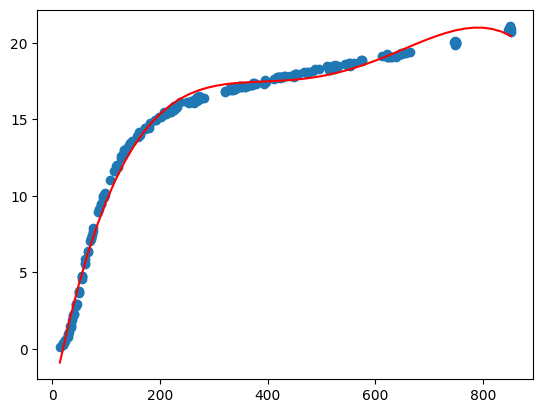

In [86]:
kelvin = np.linspace(X.min(), X.max())
plt.scatter(X,y)
plt.plot(kelvin, polinomio(kelvin,*params), color='red')

## División dataset

In [134]:
df.head()

,Expansión,Kelvin
0,0.591,24.41
1,1.547,34.82
2,2.902,44.09
3,2.894,45.07
4,4.703,54.98


In [135]:
X = df['Kelvin'].values.reshape(-1,1)
y = df['Expansión'].values

In [136]:
#from sklearn.model_selection import train_test_split
from kennard_stone import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.


(188, 1)

In [138]:
def polinomio(x,a,b,c,d,e,f):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

In [139]:
# .flatten() quita una dimensión al arreglo
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

params, params_cov = curve_fit(polinomio,X_train.flatten(),y_train)
y_pred_train = polinomio(X_train, *params)
y_pred_test = polinomio(X_test, *params)


In [140]:
mean_squared_error(y_train,y_pred_train)

0.07637715605457467

In [141]:
mean_squared_error(y_test,y_pred_test)

0.09306621227256441

In [ ]:
#%pip install kennard-stone